# 2.2.1  Line Charts

- ### 数据介绍

本节用到的美国失业率数据是**时间序列数据**

**时间序列** (time series）是一组按照时间发生先后顺序进行排列的数据点序列。通常一组时间序列的时间间隔为一恒定值（如1秒，5分钟，12小时，7天，1年），因此时间序列可以作为离散时间数据进行分析处理。

`pandas`读取数据时，会把时间存储为text格式，即`object`类型,将`pandas`的列转换为`datetime`类型，需要用**`pandas.to_datetime()`**

In [1]:
import pandas as pd
unrate = pd.read_csv('unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate[:12]

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


- ### Introduction to Matplotlib

`matplotlib` 是一个 Python 的 2D 图形包。

`matplotlib.pyplot` 包含一系列类似 **MATLAB** 中绘图函数的相关函数。每个 `matplotlib.pyplot` 中的函数对当前的图像进行一些修改，例如：产生新的图像，在图像中产生新的绘图区域，在绘图区域中画线，给绘图加上标记，等等…… `matplotlib.pyplot` 会自动记住当前的图像和绘图区域，因此这些函数会直接作用在当前的图像上

In [2]:
import matplotlib.pyplot as plt

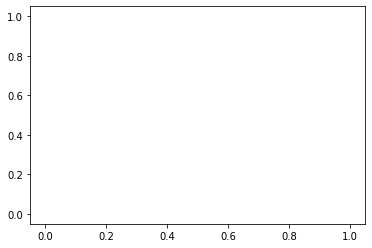

In [3]:
plt.plot()
plt.show()

`%matplotlib inline` 可以在Ipython编译器里直接使用，功能是可以**内嵌绘图**，并且可以省略掉`plt.show()`这一步。

[]

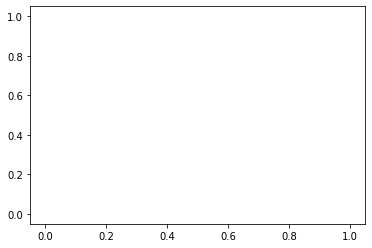

In [4]:
%matplotlib inline 
plt.plot()

- ### 给图添加数据

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


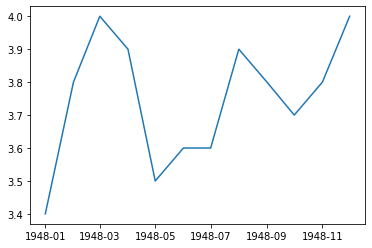

In [5]:
plt.plot(unrate['DATE'][:12],unrate['VALUE'][:12])
plt.show()

**注意**：我们没有将plt函数赋值给变量，这是因为**每次我们call 一个 pyplot函数时, 模块都会在内部（也称为状态）维护和更新plot**. 当我们call `show()`, the plot 被展示而其内部状态被摧毁。尽管这种工作流程在我们写可以重复绘图的函数时并不理想, 它在探索数据时很有用.

- ### Fixing Axis Ticks

X轴看起来有些拥挤，我们可以旋转x轴的 **ticks**（刻度）90度使它们不重叠。

`pyplot`的`xticks()`函数可以调整x轴的ticks。


```
matplotlib.pyplot.xticks(*args, **kwargs)
```


同样，对应的还有`yticks()`函数可以调整y轴的ticks。

`*args`, `**kwargs`是python中的可变参数。`*args`表示任何多个无名参数，它是一个tuple；`**kwargs`表示关键字参数，它是一个dict。并且同时使用`*args`和`**kwargs`时，必须*args参数列要在`**kwargs`前

In the documentation for the `xticks()`function, you'll see a link to the matplotlib [Text](https://matplotlib.org/stable/api/text_api.html) class, which is what pyplot uses to represent the x-axis tick labels. You'll notice that there's a `rotation` parameter that accepts degrees of rotation as a parameter. We can specify degrees of rotation using a float or integer value.

(array([711127., 711187., 711248., 711309., 711371., 711432.]),
 <a list of 6 Text xticklabel objects>)

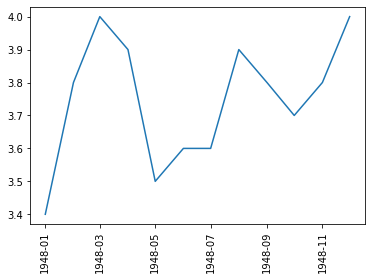

In [6]:
plt.plot(unrate['DATE'][:12],unrate['VALUE'][:12])
plt.xticks(rotation=90)

- ### 添加轴标签和标题

Here's an overview of the pyplot functions we need to tweak the axis labels and the plot title:

- `xlabel()`: accepts a string value, which gets set as the x-axis label.
- `ylabel()`: accepts a string value, which is set as the y-axis label.
- `title()`: accepts a string value, which is set as the plot title.

Text(0.5, 1.0, 'Monthly Unemployment Trends, 1948')

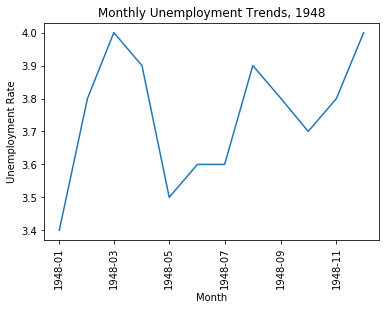

In [7]:
plt.plot(unrate['DATE'][:12],unrate['VALUE'][:12])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')

# 2.2.2 Multiple Plots

- ### Matplotlib Classes

当我们处理single plot时，pyplot正在处理和更新该plot的状态。我们可以使用pyplot模块里的方法来调整该plot。

当理multiple plots, 我们需要更明确地说明我们想要更改哪张plot。这意味着我们需要理解pyplot内部维持状态时用到的matplotlib类。

当我们创建一个plot时，pyplot在后台存储了什么：

- 一个容器 for all plots was created (returned as a [Figure object](https://matplotlib.org/stable/api/figure_api.html))
- 一个容器 for the plot was positioned on a grid (the plot returned as an [Axes object](https://matplotlib.org/stable/api/axes_api.html))
- 添加到plot的视觉符号 (using the Axes methods)

figure作为容器存储所有的plots，并且具有自定义容器内所有plots外观和行为的方法。例如调整绘图区域的整体宽度，和plots之间的间距。

我们可以手动创建一个figure：
```
fig = plt.figure()
```
此时fig中没有数据，类似于之前的空白图。

Axes object充当plot的各个组成部分的自身容器，如：

- values on the x-axis and y-axis
- ticks on the x-axis and y-axis
- all visual symbols, such as:
 + markers
 + lines
 + gridlines

在matplotlib中，当使用Axes类绘制plots时，plots也被称为subplots（子图）。

我们可以使用`Figure.add_subplot()`往一个figure中添加新的subplot. 这会返回一个新的Axes对象，因此需要分配到一个变量中。

```
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```
创建一个含有上下排列的两个plots的figure:
```
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```
以上操作会创建一个两行一列的plots网格

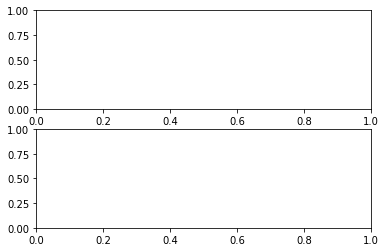

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

- ### Grid Positioning
```
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```
方法的前两个参数分别代表plots网格的行数和列数，当第一个subplot生成时，matplotlib知道去创建一个2行1列的plots网格。当我们往plots网格中（即figure）添加plot时，我们用第三个参数指定该plot在网格中的位置坐标。当网格为多行多列时，其位置坐标以从做到右，自上而下的顺序排列。

- ### Adding Data

想要在Axes对象里生成line chart，需要call [Axes.plot()](https://app.dataquest.io/m/143/multiple-plots/5/adding-data)并传递数据。

类似于`pyplot.plot()`,`Axes.plot()`接受任何可遍历的数据，如Numpy array、pandas Series等。

每次想要生成line char,都需要call`Axes.plot()`并传递数据。

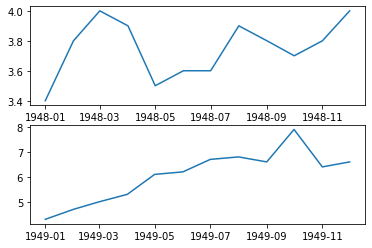

In [9]:
fig = plt.figure() #创建figure
ax1 = fig.add_subplot(2,1,1) #把fig划分为一个2行1列的plots网格，分配Axes对象-ax1-在网格1号位置
ax2 = fig.add_subplot(2,1,2) #把fig划分为一个2行1列的plots网格，分配Axes对象-ax2-在网格2号位置
ax1.plot(unrate['DATE'][:12],unrate['VALUE'][:12]) #传递数据
ax2.plot(unrate['DATE'][12:24],unrate['VALUE'][12:24]) #传递数据
plt.show()

- ### Formating and Spacing

设置绘图区域的大小：
```
fig = plt.figure(figsize=(width, height))
```

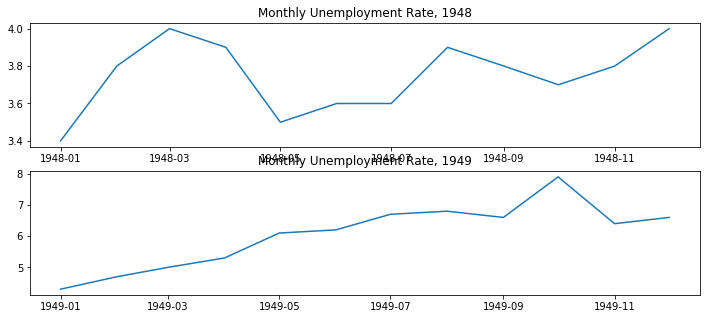

In [10]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948') #给相应的plot添加title
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

- ### Comparing Across More Years

[range() function](https://docs.python.org/3/library/functions.html#func-range)
```
>>> list(range(10))
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
>>> list(range(1, 11))
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
>>> list(range(0, 30, 5))
[0, 5, 10, 15, 20, 25]
>>> list(range(0, 10, 3))
[0, 3, 6, 9]
>>> list(range(0, -10, -1))
[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]
>>> list(range(0))
[]
>>> list(range(1, 0))
[]
```

使用`for`循环和`range()`绘制上图：

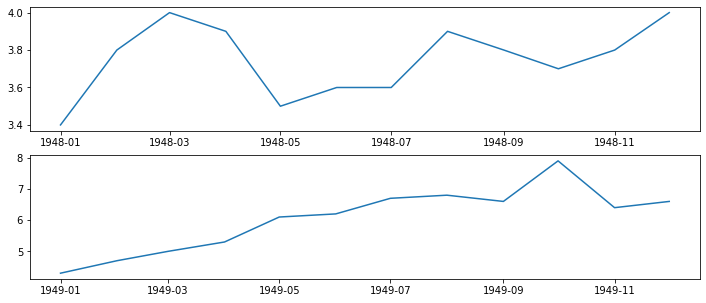

In [11]:
fig = plt.figure(figsize=(12,5))

for i in range(2):
    ax = fig.add_subplot(2,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

对比五年的：

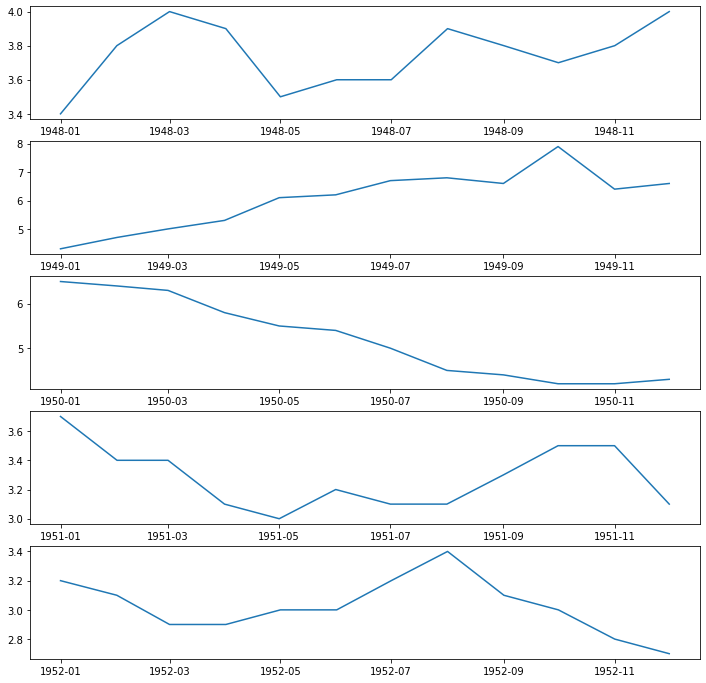

In [12]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    subset = unrate[i*12:(i+1)*12]
    ax.plot(subset['DATE'],subset['VALUE'])
            
plt.show()

- ### 在同一坐标网格上生成多个plots

提取“月份”：

`unrate['MONTH'] = unrate['DATE'].dt.month`

`pandas.Series.dt.month` 返回一个包含the integer values for each month 的 Series

之前，我们使用`pyplot.plot()`生成单个的single line chart. 在后台, matplotlib 创建一个 figure 和一个 single subplot for this line chart. 如果我们多次 call `pyplot.plot()`, matplotlib 会在 the single subplot 上生成多个line charts.

默认情况下，matplotlib会为不同的线生成不同的颜色，想要设置特定的颜色，可以在call `plot()`时使用`c`参数

`plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')`

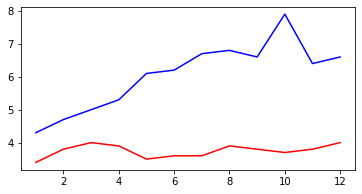

In [13]:
unrate['MONTH'] = unrate['DATE'].dt.month

fig = plt.figure(figsize=(6,3))

plt.plot(unrate['MONTH'][:12], unrate['VALUE'][:12], c='red')
plt.plot(unrate['MONTH'][12:24], unrate['VALUE'][12:24], c='blue')

plt.show()

### **exercise**:

- Set the plotting area to a width of 10 inches and a height of 6 inches.
- Generate the following plots in the base subplot:

 + 1948: set the line color to `"red"`
 + 1949: set the line color to `"blue"`
 + 1950: set the line color to `"green"`
 + 1951: set the line color to `"orange"`
 + 1952: set the line color to `"black"`
- Use `plt.show()` to display the plots.

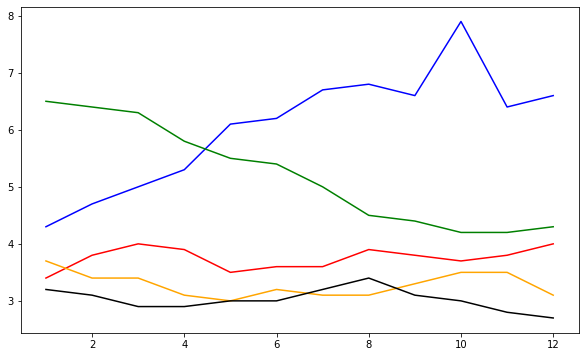

In [14]:
fig = plt.figure(figsize=(10,6))

colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    subset = unrate[i*12:(i+1)*12]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i])
    
plt.show()

- ### Adding a Legend(图例)

添加图例需要先给每条线设置标签，`pyplot.plot()`的`label`参数，允许我们为每个颜色设置文本标签，在本例子中的标签应为年份：

`plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label='1948')`   
`plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label='1949')`

我们可以使用[pyplot.legend](https://matplotlib.org/2.0.2/api/pyplot_api.html)创建图例，还可以使用参数`loc`指定图例显示的位置:

`plt.legend(loc='upper left')`

**绘制多个subplots时：**

When we use `plt.plot()` and `plt.legend()`, the `Axes.plot()` and `Axes.legend()` methods are called under the hood and parameters passed to the calls. When we need to create a legend for each subplot, we can use `Axes.legend()` instead.

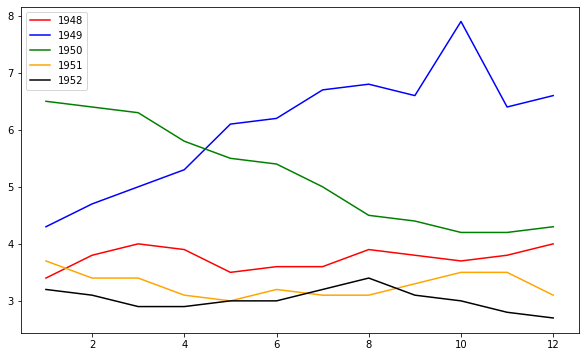

In [15]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
years = ['1948','1949','1950','1951','1952']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=years[i])
plt.legend(loc='upper left')
plt.show()

此时图例在网格里面，想要把它移到网格外面需要了解更多关于matplotlib的知识，我们将会在以后介绍

添加title和轴label：

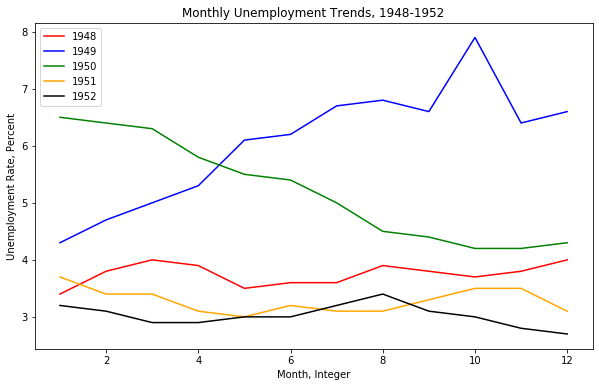

In [16]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')

plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()

**其他：注释和反注释**

选中想要注释或反注释的行，然后`ctrl` + `/` (PC) or `⌘` + `/` (Mac) 

## 2.2.3 Bar Plots and Scatter Plots

之前使用的数据集是时间序列数据集，数据行之间的顺序有着逻辑关系，因此使用line chart是合适的。

对于没有特定顺序的数据集，可能需要其他形式的图像

数据介绍：

To investigate the potential bias that movie reviews sites have, **FiveThirtyEight** compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from **Metacritic, Fandango, Rotten Tomatoes**, and **IMDB** review and rate the film. They also ask the users in their respective communities to review and rate the film. Then, they calculate the average rating from both critics and users and display them on their site. 

**FiveThirtyEight** compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings. After discovering that a few films that weren't good were still rated highly on Fandango, the team investigated and published an article about bias in movie ratings.

We'll be working with the `fandango_scores.csv` file, which can be downloaded from the FiveThirtEight Github repo. Here are the columns we'll be working with in this mission:

- `FILM` - film name
- `RT_user_norm` - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
- `Metacritic_user_nom` - average user rating from Metacritic, normalized to a 1 to 5 point scale
- `IMDB_norm` - average user rating from IMDB, normalized to a 1 to 5 point scale
- `Fandango_Ratingvalue` - average user rating from Fandango, normalized to a 1 to 5 point scale
- `Fandango_Stars` - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest `0.5` value). The `Fandango_Ratingvalue` column reflects the true average rating while the `Fandango_Stars` column reflects the displayed, rounded rating.

In [17]:
reviews = pd.read_csv('fandango_scores.csv')#, index_col = 0)
# reviews.index.name = None
norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 
                        'Fandango_Ratingvalue', 'Fandango_Stars']]
norm_reviews.head(5)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


- ### Creating Bars

想要创建bar plot，首先需要确定bar的位置和宽度

我们可以使用 [pyplot.bar()](https://matplotlib.org/2.0.2/api/pyplot_api.html) 或 [Axes.bar()](https://matplotlib.org/stable/api/axes_api.html)生成条形图.  我们将使用 `Axes.bar()` so we can extensively customize the bar plot more easily.

[pyplot.subplots()](https://matplotlib.org/2.0.2/api/pyplot_api.html)可以生成一个 single subplot，并返回Figure and Axes object.    

`fig, ax = plt.subplots()`   

这是

`fig = plt.figure()`   
`ax = fig.add_subplot()`

的快捷写法。

`Axes.bar()`至少需要两个参数：`left`和`height`. `left`用来设置bar的左侧在x轴上的坐标，**(注意最近版本的 Matplotlib的语法有更改, 用 `x` 替换了 `left`, `x`指定的是bar底边中点的坐标)**. 参数`height`设置每个bar的高度，通常接收**list-like**类型的数据。

函数[np.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)返回一组间隔均匀的值，我们用它来生成bar的`left`侧的位置。

In [18]:
import numpy as np
np.arange(3)

array([0, 1, 2])

In [19]:
np.arange(3.0)

array([0., 1., 2.])

In [20]:
np.arange(3,7)

array([3, 4, 5, 6])

In [21]:
np.arange(3,7,2)

array([3, 5])

`range()`和`np.arange()`的区别

In [22]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [23]:
range(5)

range(0, 5)

还可以使用`width`参数定义bar的宽度, `width`是可选参数，默认情况下位`0.8`, 以下将其改为`1.5`

`ax.bar(bar_positions, bar_heights, 1.5)`

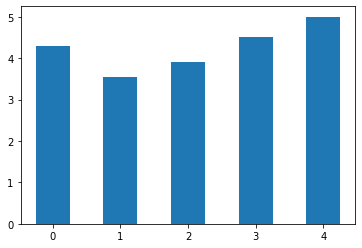

In [24]:
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values

# Positions of the 5 bars. [0, 1, 2, 3, 4]
from numpy import arange
bar_positions = arange(5)

fig, ax = plt.subplots()
ax.bar(x=bar_positions, height=bar_heights, width=0.5)
plt.show()

- ### 添加轴刻度和标签

matplotlib默认设置轴标签为整数形式

我们可以使用 `Axes.set_xticks()` 把刻度设置为 [0, 1, 2, 3, 4]:
```
tick_positions = range(0,5)
ax.set_xticks(tick_positions)
```

然后使用 `Axes.set_xticklabels()` 设置刻度标签:
```
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.set_xticklabels(num_cols)
```

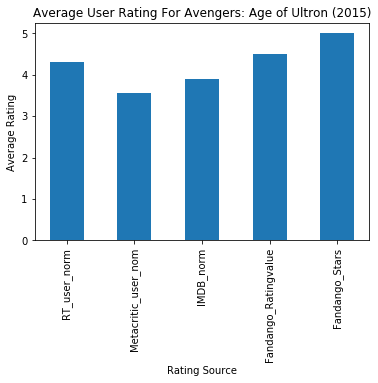

In [25]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5)
tick_positions = range(0,5)

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)

ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

- ### 水平条形图

`Axes.barh(y, width)`，与垂直条形图有些不同，`y`为bar在**y轴**的位置，`width`为bar的**长度**，可以用`height`设置bar在y轴的**宽度**。

设置刻度时使用`Axes.set_yticks()`和`Axes.set_yticklabels()`

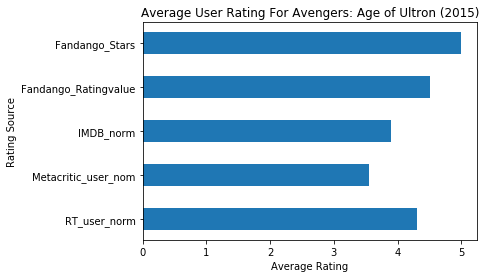

In [26]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5)
tick_positions = range(0,5)

fig, ax = plt.subplots()
ax.barh(y=bar_positions,width=bar_widths, height=0.5)

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

- ### Scatter Plot

尽管条形图帮助我们视觉化少量数据点并快速比较它们，但是它不能帮助我们视觉化多个数据点的数据

散点图帮助我们判断两列数据的相关性. While calculating the correlation coefficient will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

绘制散点图, we use `Axes.scatter()`. The `scatter()` method has 2 required parameters, `x` and `y`, which matches the parameters of the `plot()` method. The values for these parameters need to be **iterable** objects of matching lengths (lists, NumPy arrays, or pandas series).

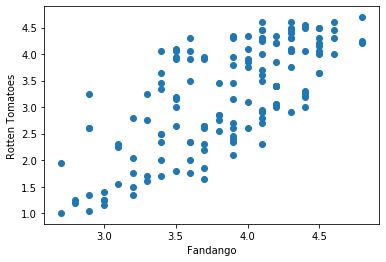

In [27]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")
plt.show()

可以看出弱正相关，之所以弱是因为每一个x值都有多个相对应的y值

- ### 轴交换

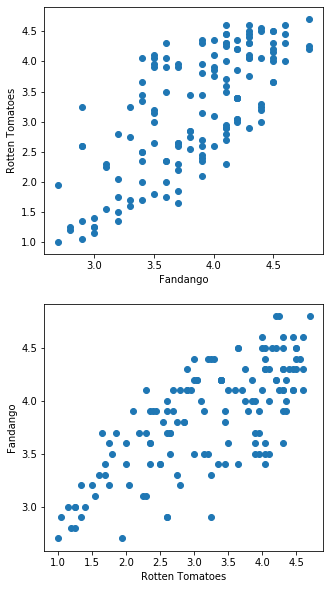

In [28]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

ax1.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')

ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')

plt.show()

- ### Benchmarking Correlation

当生成多个散点图时，相同的x轴和y轴是很重要的。我们可以使用 `Axes.set_xlim()` and `Axes.set_ylim()` 设置两个轴的data limits(数据限制)：
`ax.set_xlim(0, 5)`   
`ax.set_ylim(0, 5)`

默认情况下，matplotlib使用最小的数据限制展示图像。手动设置轴的数据限制可以方便我们对比。

甚至，我们可以使用该方法来放大图的一部分，例如：   
`ax.set_xlim(4, 5)`   
`ax.set_ylim(4, 5)`

这使得数据中实际值的细微变化在绘图中显得更大。在范围从`0`到`5`的图中，很难以肉眼观察到`0.1`的差异。但在仅`4`到`5`范围内的图中，差异`0.1`很容易看到，因为该差异是该范围的`1/10`。

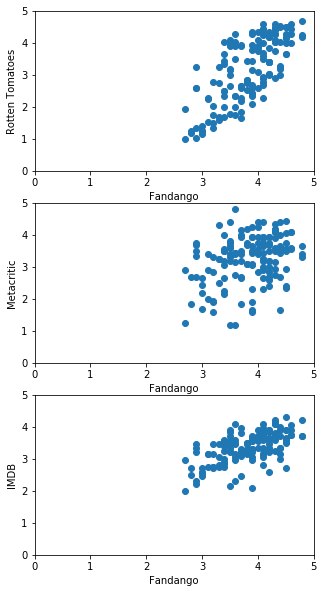

In [29]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

plt.show()

从散点图中，我们可以得出结论：与IMDB或Fandango相比，Metacritic和Rotten Tomatoes的用户评分具有更大的价值范围。 因为Metacritic和Rotten Tomatoes的用户评分为1至5。而Fandango的用户评分为大约2.5至5，而IMDB的用户评分为大约2至4.5。

不幸的是，散点图仅使我们粗略地了解了每个评论网站上用户评分的分布。例如，如果数据集中IMDB和Fandango的一百部电影的平均用户评分相同，则散点图中我们只会看到一个标记。在下一个任务中，我们将学习两种类型的图，这些图可以帮助我们理解值的分布。

# 2.2.4 Histograms and Box Plots

- ### 频数分布

生成频数分布表：

`freq_counts = df['Fandango_Ratingvalue'].value_counts()`

通过index排序：

`sorted_freq_counts = freq_counts.sort_index()`

In [30]:
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts().sort_index()

imdb_distribution = norm_reviews['IMDB_norm'].value_counts().sort_index()

print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


- ### Histogram in Matplotlib

绘制直方图需要用到`Axes.hist()`, 该函数只有一个必需的参数--一个可遍历的对象

默认情况下，Matplotlib会：

- 计算序列的最大值和最小值
- 创建10个**等长**的bins，其范围从最小值到最大值
- 将unique的值分配到bins中
- 计算出对应的unique值的频数和
- 为每个bin的频数和生成bar

`Axes.hist()`默认范围是从最小到最大，如果想要更改的话可以使用`range`参数，该参数接受`tuple`

`ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))`

直方图用于连续性数据

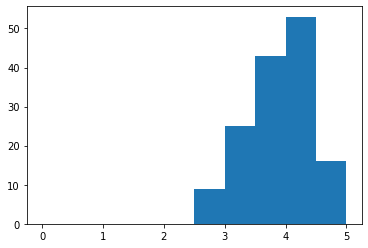

In [31]:
fig, ax1 = plt.subplots()
ax1.hist(norm_reviews['Fandango_Ratingvalue'], range=(0,5))
plt.show()

此时bin的长度为`0.5`(5/10), 我们可以将bin的数量从默认的10提高到20，以提高分布的精确性，此时每个bin的长度将为`0.25`(5/20)

`Axes.hist()`的第二个参数`bin`可以做到这一点：

`# Either of these will work.`   
`ax.hist(norm_reviews['Fandango_Ratingvalue'], 20, range=(0, 5))`   
`ax.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))`

为所有四列使用20个bin来生成直方图。为了确保所有直方图的y轴比例都是相同的，可以使用`Axes.set_ylim()`函数

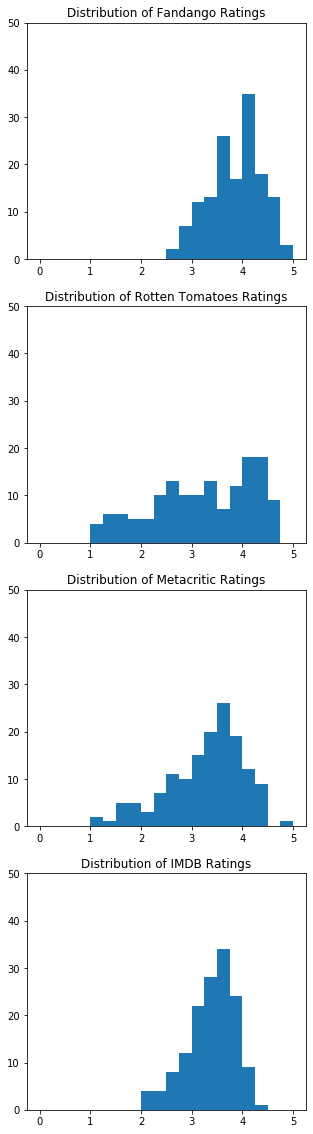

In [32]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], 20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2.hist(norm_reviews['RT_user_norm'], 20, range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3.hist(norm_reviews['Metacritic_user_nom'], 20, range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)

plt.show()

- ### Box Plot

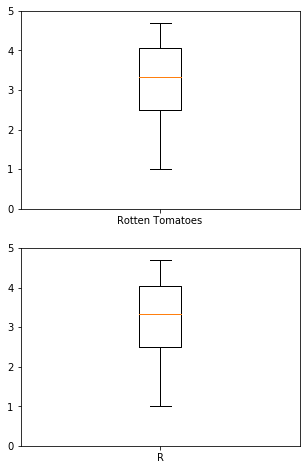

In [33]:
fig = plt.figure(figsize=(5,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.boxplot(norm_reviews['RT_user_norm'])
ax1.set_ylim(0,5)
ax1.set_xticklabels(['Rotten Tomatoes'])

ax2.boxplot(norm_reviews['RT_user_norm'])
ax2.set_ylim(0,5)
ax2.set_xticklabels('Rotten Tomatoes')

plt.show()

注意，`Axes.set_xticklabels`接受的是可遍历的对象，因此如果直接传递`'Rotten Tomatoes'`，只会根据刻度的数量返回第一个字符`R`，因此要用方括号包住

- ### Multiple Box Plots

向`Axes,boxplot()`中传递多列数据可以在一个图中绘制多个箱线图，因此需要用到`values`存取器来仅提取df中的值，而不包含行名和列名

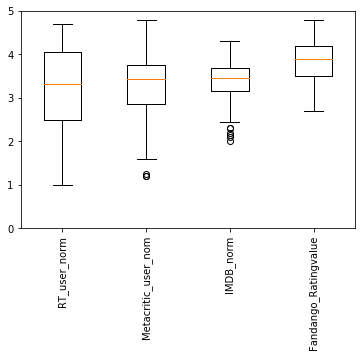

In [34]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)

plt.show()

In [2]:
norm_reviews[num_cols].values

NameError: name 'norm_reviews' is not defined

In [36]:
norm_reviews[num_cols]

,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue
0,4.30,3.55,3.90,4.5
1,4.00,3.75,3.55,4.5
2,4.50,4.05,3.90,4.5
3,4.20,2.35,2.70,4.5
4,1.40,1.70,2.55,3.0
...,...,...,...,...
141,3.90,3.95,3.70,4.0
142,4.10,3.75,3.60,3.5
143,3.90,4.40,3.70,3.5
144,4.05,3.65,3.90,3.5


# 2.2.5 Relational Plots and Multiple Variables

下图只用了一张图就显示了5个变量

![screen1_1](screen1_1.png)

以上五个变量为：

- `SalePrice`: price of the sale in USD
- `Gr Liv Area`: above grade (ground) living area in square feet
- `Overall Qual`: quality ratings of the overall material and finish of the house
- `Garage Area`: garage area in square feet
- `Rooms`: number of rooms

In [1]:
import pandas as pd
housing = pd.read_csv('housing.csv')

使用seaborn的 [sns.replot()](https://seaborn.pydata.org/generated/seaborn.relplot.html) 函数，首先从两个变量开始：

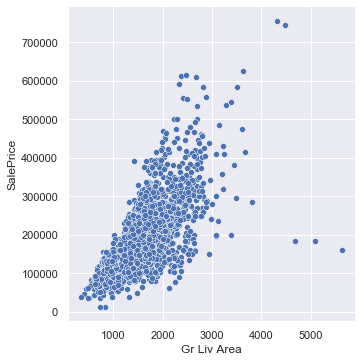

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice')
plt.show()

默认情况下seaborn使用Matplotlib的默认样式，转换为seaborn的默认样式，运行 `sns.set_theme()`函数

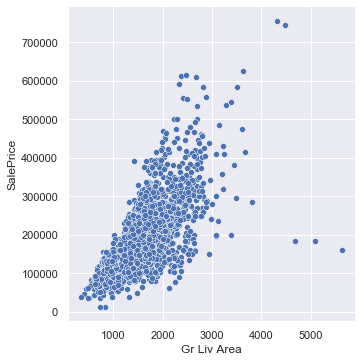

In [3]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice')
plt.show()

- ### Variable Representation: Color

Below, we use the `hue` parameter to add the `Overall Qual` variable on the scatter plot. 

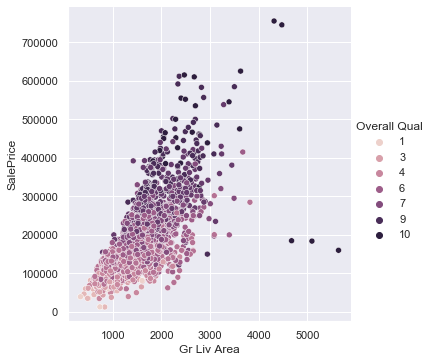

In [5]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual')
plt.show()

假设想要更改默认的颜色，把它改为从红到绿，使用`palette`参数

参数`palette`: string, list, dict, or [matplotlib.colors.Colormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html)

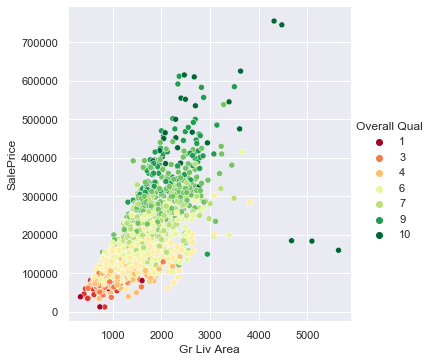

In [6]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn')
plt.show()

The argument `'RdYlGn'` contains three abbreviations:

`Rd`: red
`Yl`: yellow
`Gn`: green

其它的一些color palettes:
![color_palettes](color_palettes.png)

- ### Variable Representation: Size

Below, we use a size representation to add the `Garage Area` variable on the graph — we use the `size` parameter. 

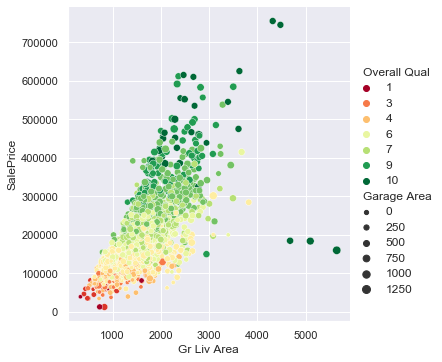

In [7]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area')
plt.show()

可以看到大小区别不明显，为了更易于观察，我们可以改变大小变化的幅度 -- `sizes`参数接受一个指定最小和最大尺寸的`tuple`

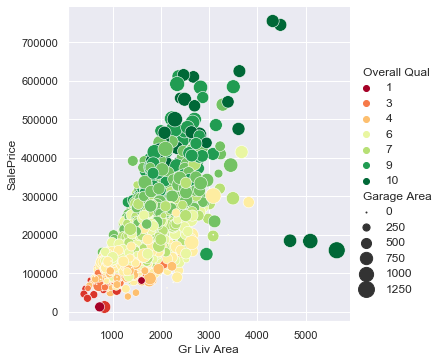

In [8]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300))
plt.show()

`sizes`参数仅在该列数据是数值型时接受`tuple`，对于类别型数据，`sizes`接收`list`或`dist`

`Rooms`列是类别型的：

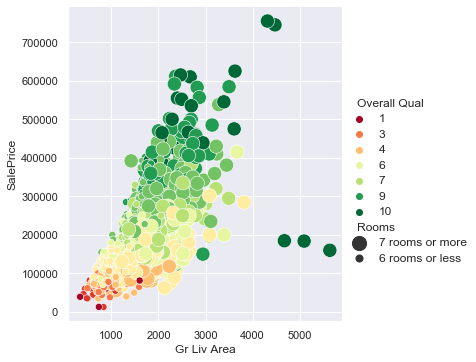

In [9]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Rooms', sizes=[200,50])
plt.show()

- ### Variable Representation: Shape

以下，通过改变marker的形状添加变量 `Rooms`. A circle now means a house with seven rooms or more, and an "x" sign represents a house with six rooms or less. To make this change, we use the `style` parameter.

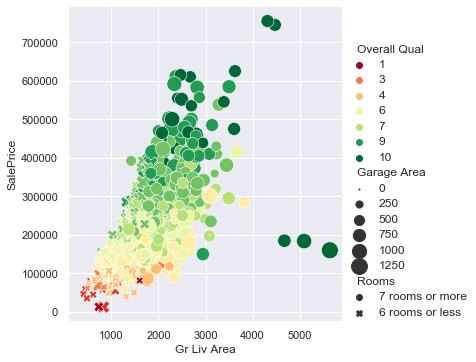

In [10]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms')
plt.show()

默认seaborn用 圆 和 x 来表示，可以通过`marker`参数更改成[其他样式](https://matplotlib.org/3.3.3/api/markers_api.html)

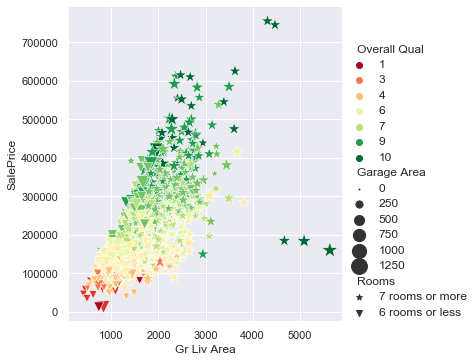

In [11]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', markers=['*','v'])
plt.show()

- ### Variable Representation: Spatial Separation

Below, we add the `Year` column using the `col` parameter:

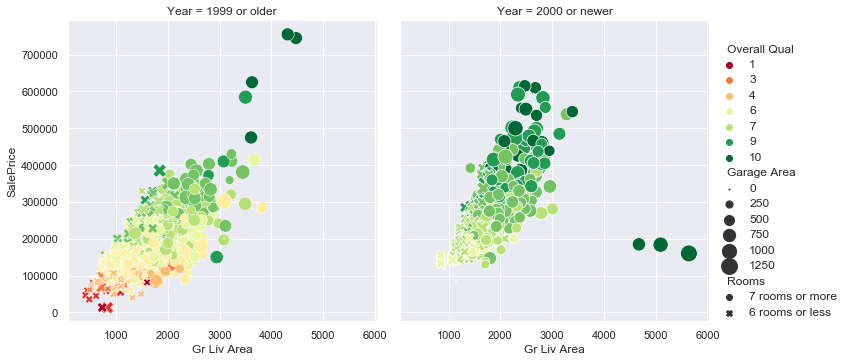

In [19]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', col='Year')
plt.show()

每个图单独展示5个变量，但合在一起展示了6个变量,

还可以像conditional plot章节里一样，再添加参数`row`，这样能展示7个变量

我们构建的图形本质上是一个散点图。然而，由于它显示了这么多变量之间的关系，我们称之为**relational plot 关系图**.